In [118]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [119]:
image = plt.imread('china-original.png')
shape = image.shape

In [120]:
limage = image.reshape((-1,3))

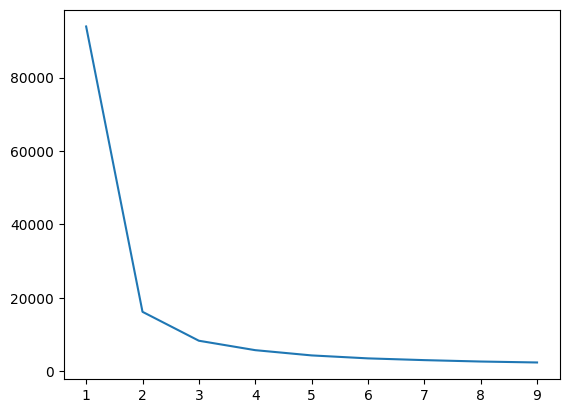

In [121]:
plt.plot(list(range(1,10)),[KMeans(i, n_init='auto').fit(limage).inertia_ for i in range(1, 10)])

In [122]:
kmeans = KMeans(3,n_init='auto').fit(limage)
predictions = kmeans.cluster_centers_[kmeans.labels_]
cimage = predictions.reshape(shape)

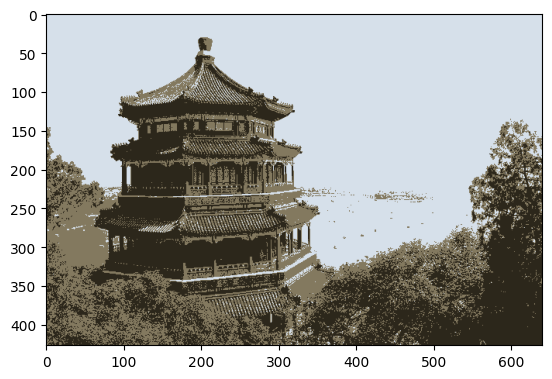

In [123]:
plt.imshow(cimage)